In [1]:
import numpy as np
from pypolyagamma import PyPolyaGamma
%matplotlib inline
from pylab import plot, show, legend
import matplotlib.pyplot as plt
import numpy.random as npr 

In [2]:
def acf(x, maxlag) :
    n = np.shape(x)[0]
    acf_vec = np.zeros(maxlag)
    xmean = np.mean(x)
    for lag in range(maxlag) :
        index, index_shifted = range(0, n-lag), range(lag, n)
        acf_vec[lag] = np.mean((x[index]-xmean)*(x[index_shifted]-xmean))
    return acf_vec/np.var(x)

In [3]:
mu = 0.0
sigmasq = 100
y = 1

In [14]:
N_samples = 10**5
pg = PyPolyaGamma(seed=0)
xs = np.zeros((N_samples, 2))
omegas = np.ones((N_samples, 2))

# Now run the Gibbs sampler
N = [10**3, 10**4]
for i in range(1, N_samples):
    # Sample omega given x, y from its PG conditional
    for j in range(2):
        omegas[i,j] = pg.pgdraw(N[j], xs[i-1,j])
        omegas[i,j] = pg.pgdraw(N[j], xs[i-1,j])

        # Sample x given omega, y from its Gaussian conditional
        sigmasq_hat = 1./(1. / sigmasq + omegas[i,j])
        mu_hat = sigmasq_hat * (mu / sigmasq + (y - N[j] / 2.))
        xs[i,j] = npr.normal(mu_hat, np.sqrt(sigmasq_hat))

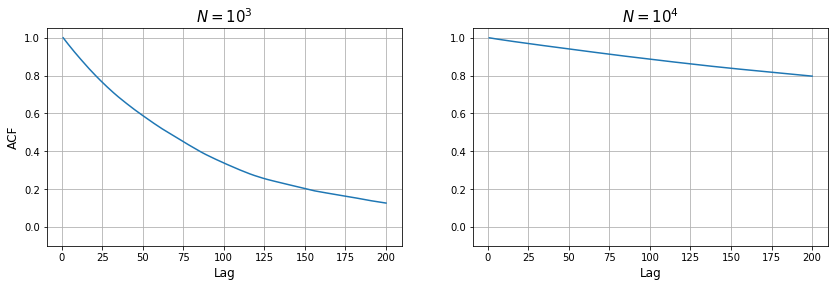

In [15]:
maxlag = 200
plt.rcParams['figure.figsize'] = (14, 4)
a, b = -0.1, 1.05

fig = plt.figure()
ax = fig.add_subplot(1,2,1) 
ax.plot(range(1, maxlag+1), acf(xs[:,0], maxlag))
plt.ylim([a, b])
plt.ylabel('ACF', fontsize=12)
plt.title(r"$N=10^3$", fontsize=15)
plt.grid(True)
plt.xlabel("Lag", fontsize=12)

ax = fig.add_subplot(1,2,2) 
ax.plot(range(1, maxlag+1), acf(xs[:,1], maxlag))
plt.ylim([a, b])
plt.title(r"$N=10^4$", fontsize=15)
plt.grid(True)
plt.xlabel("Lag", fontsize=12)
plt.show()

# fig.savefig('1d_ACF_polya_gamma.pdf', format='pdf', dpi=10000, bbox_inches='tight')

In [16]:
acf_pg_1 = acf(xs[:,0], maxlag) 
acf_pg_2 = acf(xs[:,1], maxlag)

In [17]:
np.savetxt("acf_pg_1.csv", acf_pg_1)
np.savetxt("acf_pg_2.csv", acf_pg_2)